In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [3]:
ls

 CNN-model.ipynb                       early-blight.JPG
 custom_vgg16_acc_96.h5                feature_maps.ipynb
 custom_vgg16_lr_0.01.h5               features.pkl
 custom_vgg16_lr_0.05.h5               healthy.JPG
 custom_vgg16_lr_0.05_opt_rmsprop.h5   labels.pkl
 custom_vgg16_opt_adam_no_lr.h5        late-blight.JPG
 custom_vgg16_opt_rmsprop_no_lr.h5     MobileNet.ipynb
 custom_vgg16_opt_sgd_no_lr_02.h5      pred_table.ipynb
 custom_vgg16_opt_sgd_no_lr_03.h5     'Project files'/
 custom_vgg16_opt_sgd_no_lr.h5         vgg16-tweaked-model.ipynb


In [4]:
import pickle 
import time
import numpy as np
import pandas as pd
from keras.preprocessing import image
import tensorflow as tf
from keras.applications.mobilenet import preprocess_input, decode_predictions
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import merge, Input
from keras.models import Model
from keras.applications.mobilenet import MobileNet
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical

In [5]:
pickle_in_features = open('features.pkl', 'rb')
x = pickle.load(pickle_in_features)
x = np.array(x, dtype=np.float64)

pickle_in_labels = open('labels.pkl', 'rb')
y = pickle.load(pickle_in_labels)
y = np.array(y, dtype=np.int64)
# y = to_categorical(y)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=2)

print(x_train.shape)
print(y_train.shape)

(2105, 224, 224, 3)
(2105,)


In [8]:
mn_model = MobileNet(weights='imagenet')
mn_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [9]:
classes = 3

image_input = Input(shape=(224, 224, 3))

model = MobileNet(input_tensor=image_input, include_top=True, weights='imagenet')

last_layer = model.output
x = Flatten(name='flatten')(last_layer)
out = Dense(classes, activation='softmax', name='output')(last_layer)
custom_vgg_model = Model(image_input, out)
custom_vgg_model.summary()


print(image_input.shape)


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [11]:
for layer in custom_vgg_model.layers[:-1]:
    layer.trainable = False

# opt = keras.optimizers.RMSprop(learning_rate=0.05)

custom_mobilenet_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

t = time.time()

EPOCH = 20
hist = custom_mobilenet_model.fit(x_train, y_train, batch_size=32, epochs=EPOCH, verbose=2, validation_split=0.2)

print('Training time: %s' % (t - time.time()))



Epoch 1/20
53/53 - 42s - loss: 1.0885 - accuracy: 0.5356 - val_loss: 1.0795 - val_accuracy: 0.6366
Epoch 2/20
53/53 - 2s - loss: 1.0680 - accuracy: 0.7286 - val_loss: 1.0603 - val_accuracy: 0.7506
Epoch 3/20
53/53 - 2s - loss: 1.0487 - accuracy: 0.7678 - val_loss: 1.0417 - val_accuracy: 0.7387
Epoch 4/20
53/53 - 2s - loss: 1.0296 - accuracy: 0.7910 - val_loss: 1.0239 - val_accuracy: 0.7577
Epoch 5/20
53/53 - 2s - loss: 1.0113 - accuracy: 0.7987 - val_loss: 1.0068 - val_accuracy: 0.7601
Epoch 6/20
53/53 - 2s - loss: 0.9939 - accuracy: 0.8034 - val_loss: 0.9902 - val_accuracy: 0.7601
Epoch 7/20
53/53 - 2s - loss: 0.9767 - accuracy: 0.8058 - val_loss: 0.9743 - val_accuracy: 0.7720
Epoch 8/20
53/53 - 2s - loss: 0.9603 - accuracy: 0.8017 - val_loss: 0.9585 - val_accuracy: 0.7672
Epoch 9/20
53/53 - 2s - loss: 0.9448 - accuracy: 0.8034 - val_loss: 0.9437 - val_accuracy: 0.7648
Epoch 10/20
53/53 - 2s - loss: 0.9290 - accuracy: 0.8100 - val_loss: 0.9295 - val_accuracy: 0.7672
Epoch 11/20
53/53 

In [12]:
(loss, accuracy) = custom_mobilenet_model.evaluate(x_test, y_test , batch_size=10, verbose=2)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

91/91 - 2s - loss: 0.8064 - accuracy: 0.7885
[INFO] loss=0.8064, accuracy: 78.8483%


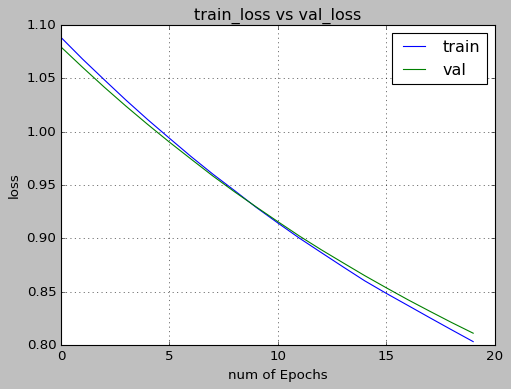

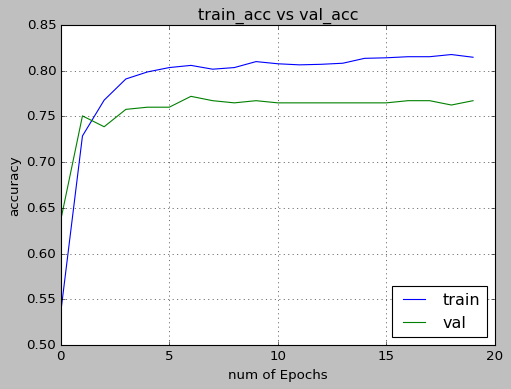

In [15]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(EPOCH)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
plt.style.use(['classic'])